In [3]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
#from utils import *

In [3]:
data_dir = '/storage/cluster/data/'

coords = np.genfromtxt(data_dir+'coords.txt')

In [26]:
coords_dir = '/storage/cluster/data/'
dens_dir = '/storage/filament/data/box01/256den18a+1024+1'

coords = np.genfromtxt(coords_dir + 'coords.txt')

In [7]:
dens = np.genfromtxt(dens_dir)
dens = dens.reshape([256,256,256])

In [27]:
#m = 3*(np.log10(r*0.39*0.7*3.0856*10**24)) + np.log10(dens_mean*(1.879*10**-29)*(1.428**2)*(0.28)) + np.log10(4*np.pi/3)
#dens_mean

virial_mass = []

coords_x = []
coords_y = []
coords_z = []
coords_r = []

for nn,(ix,iy,iz,r) in enumerate(coords):
    ix = int(ix)
    iy = int(iy)
    iz = int(iz)
    r = int(r)
    if ix-r >= 0 and ix+r+1 <= 255 and iy-r >= 0 and iy+r+1 <= 255 and iz-r >= 0 and iz+r+1 <=255:
        coords_x.append(ix)
        coords_y.append(iy)
        coords_z.append(iz)
        coords_r.append(r)
        
        dens_mean = np.mean(dens[ix-r:ix+r+1, iy-r:iy+r+1, iz-r:iz+r+1])
        m = 3*(np.log10(r*0.39*0.7*3.0856*10**24)) + np.log10(dens_mean*(1.879*10**-29)*(1.428**2)*(0.28)) + np.log10(4*np.pi/3)
        virial_mass.append(m)
        
        
virial_coords = np.array(list(zip(coords_x,coords_y,coords_z,coords_r)))


In [28]:
np.savetxt('/storage/cluster/data/virial_coords.txt',coords,fmt='%3i')

In [1]:
xray_dir = '/storage/filament/data/box01/256den18g+1024+1'
temp_dir = '/storage/filament/data/box01/256den18f+1024+1'

In [4]:
xray = np.genfromtxt(xray_dir)
xray = xray.reshape([256,256,256])

temp = np.genfromtxt(temp_dir)
temp = temp.reshape([256,256,256])

In [63]:
virial_coords = np.genfromtxt('/storage/cluster/data/virial_coords.txt')

xray_temp =[]
for nn,(ix,iy,iz,r) in enumerate(virial_coords):

    ix = int(ix)
    iy = int(iy)
    iz = int(iz)
    r = int(r)

    xray_sum = np.sum(xray[ix-r:ix+r+1,iy-r:iy+r+1,iz-r:iz+r+1])
    xray_temp_sum = np.sum(np.dot ( temp[ix-r:ix+r+1,iy-r:iy+r+1,iz-r:iz+r+1] , xray[ix-r:ix+r+1,iy-r:iy+r+1,iz-r:iz+r+1]))
    
    xray_temp.append((xray_temp_sum/xray_sum)/(1.16*10**7))

In [66]:
r

1

In [ ]:
xray[168,224,3],temp[168,224,3]

In [48]:
xray_test = np.sum(xray[168-3:168+4,224-3:224+4,3-3:3+4])
temp_test = np.sum(np.dot( (temp[168-3:168+4,224-3:224+4,3-3:3+4]),xray[168-3:168+4,224-3:224+4,3-3:3+4]))

In [49]:
xray_test,temp_test

(3.1122188461322122, 548980478.3191899)

In [51]:
(temp_test/xray_test)/(1.16*10**7)

15.206483105194833

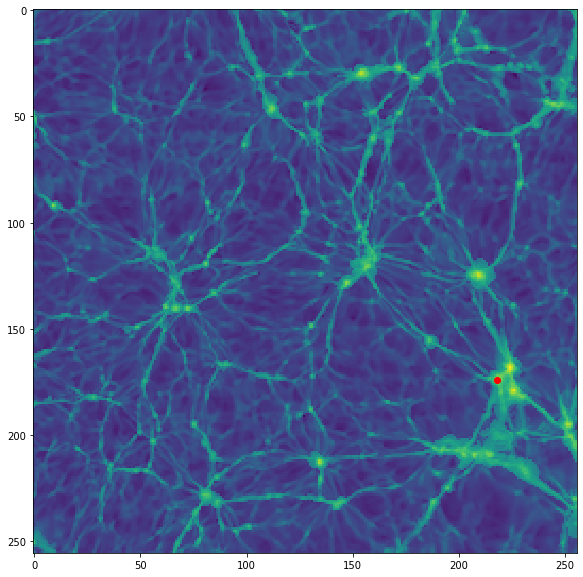

In [65]:
plt.figure(figsize=[10,10])
plt.imshow(np.log10(xray[:,:,3]))
plt.scatter(218,174,c='red')